In [5]:
#torch install
!pip install torch

import weight_perturbation as wp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import torch

In [6]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [7]:
def convex_forward(inputs, params):
    """
    A simple loss landscape to optimize
    """
    if type(params) == dict:
        weights = params["vars"]
    else:
        weights = params
    return torch.sum(weights**2)

In [45]:
n_steps = 1000
method = "ffd"
sigma = 1e-6
lr = 1e-2
sampler = torch.distributions.Normal(0, sigma)
# make a sampler

Ndim = 2

start_sampler = torch.distributions.Normal(0, 10)
initial_params = start_sampler.sample(sample_shape=torch.Size([Ndim]))
params = {"vars" : initial_params}

history = np.empty((n_steps, Ndim))

for e in range(n_steps):
    wp_grad = wp.compute_gradient(
        convex_forward, None, params, sampler, method
    )  # do forward passes and compute gradient
    params = wp.update_weights(wp_grad, params, sigma, lr)
    history[e, :] = params["vars"]

In [50]:
def plot_trajectory(history, loss_fun, nr_pix):
    space = np.max(np.abs(history)) + 1
    xyspace = torch.linspace(-space, space, nr_pix)
    X, Y = torch.meshgrid(xyspace, xyspace)
    coords = torch.stack([X, Y], dim=2)
    loss_space = torch.tensor([[loss_fun(None, x).squeeze() for x in row] for row in coords])
    plt.figure()
    plt.matshow(loss_space, extent=[-space, space, -space, space])
    plt.plot(history[:, 0], history[:, 1], color='r')
    plt.scatter(history[-1, 0], history[-1, 1], color='r')
    plt.colorbar(norm=clrs.LogNorm(0, torch.max(loss_space)))


<Figure size 640x480 with 0 Axes>

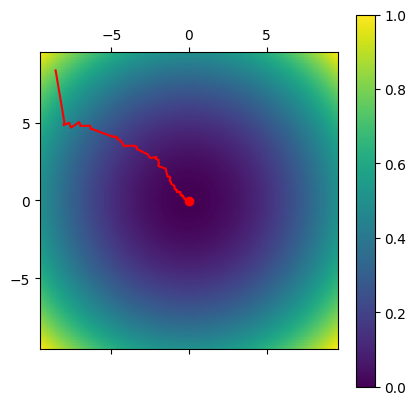

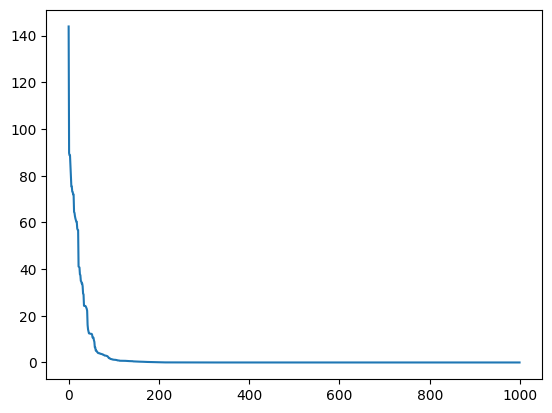

In [48]:
plot_trajectory(history, convex_forward, 200)
plt.figure()
loss_history = [convex_forward(None, {"vars" : torch.from_numpy(params)}) for params in history]
plt.plot(loss_history)
plt.show()

In [8]:

def rosenbrock_function(inputs, params):
 a=1
 b=100
 if type(params) == dict:
    weights = params["vars"]
 else:
    weights = params
 x, y = weights[0], weights[1]
 return b*(y-x**2)**2+(a-x)**2

In [42]:
n_steps = 2000
method = "ffd"
sigma = 1e-5
lr = 1e-6

sampler = torch.distributions.Normal(0, sigma)
# make a sampler

Ndim = 2

start_sampler = torch.distributions.Normal(0, 10)
initial_params = torch.tensor([3, 2])   #start_sampler.sample(sample_shape=torch.Size([Ndim]))
params = {"vars" : initial_params}

history = np.empty((n_steps, Ndim))

for e in range(n_steps):
    #loss function expecting input and weights
    wp_grad = wp.compute_gradient(
        rosenbrock_function, None, params, sampler, method
    )  # do forward passes and compute gradient
    params = wp.update_weights(wp_grad, params, sigma, lr)
    history[e, :] = params["vars"]



<Figure size 640x480 with 0 Axes>

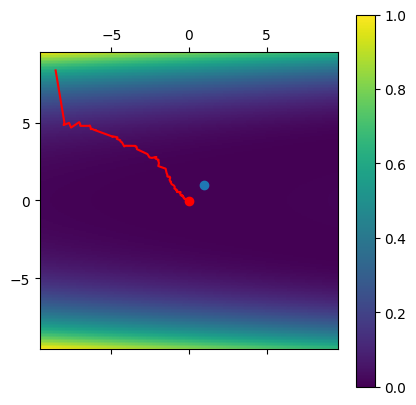

In [51]:
plot_trajectory(history, rosenbrock_function, 200)
plt.scatter(1,1)
plt.show()

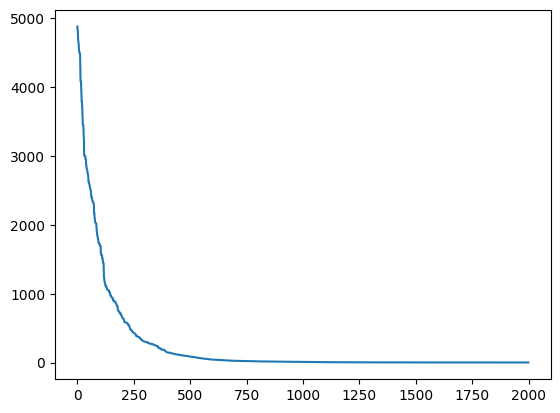

In [44]:
plt.figure()
loss_history = [rosenbrock_function(None, {"vars" : torch.from_numpy(params)}) for params in history]
plt.plot(loss_history)
plt.show()

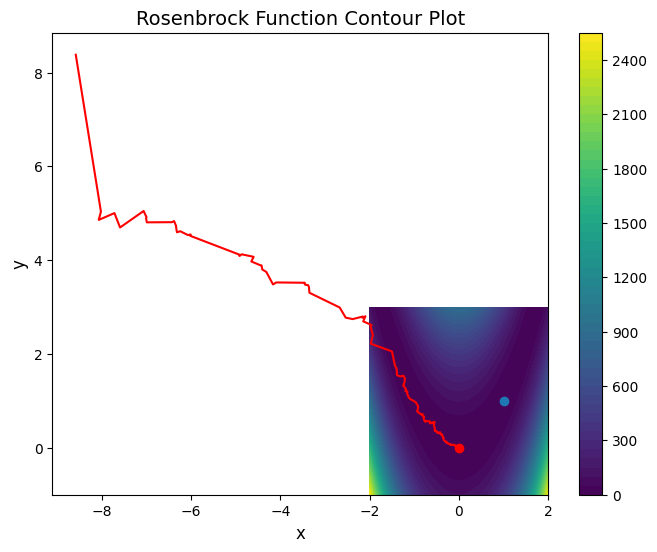

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Rosenbrock function
def rosenbrock(x, y, a=1, b=100):
    return (a - x)**2 + b * (y - x**2)**2

# Generate a grid of x and y values
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)

# Compute the function values
Z = rosenbrock(X, Y)

# Create the contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour)


plt.plot(history[:, 0], history[:, 1], color='r')
plt.scatter(history[-1, 0], history[-1, 1], color='r')
plt.scatter(1,1)


# Add labels and title
plt.title("Rosenbrock Function Contour Plot", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.show()
